# QPSK modulation
## Main libraries import

In [1]:
%matplotlib inline
import numpy as np
from numpy import log10, sqrt, pi
from matplotlib import pyplot as plt

## Instanciation of QPSK modulator and demodulator

In [2]:
from blocksim.dsp.PSKMod import PSKMapping, PSKDemapping

mapping = [pi / 4, 3 * pi / 4, 5 * pi / 4, 7 * pi / 4]
qpsk_co = PSKMapping(name="map", mapping=mapping, output_size=1)
qpsk_dec = PSKDemapping(name="demap", mapping=mapping, output_size=2)

[INFO] - Registered blocksim.loggers.CSVLogger
[INFO] - Registered blocksim.loggers.PickleLogger
[INFO] - Registered blocksim.loggers.PsqlLogger
[INFO] - Registered blocksim.loggers.XlsLogger


## Generation of the signal

In [3]:
# Generation of a random bitstream
ntot = 256
data = np.random.randint(low=0, high=2, size=(qpsk_co.mu, ntot))

# Generation of the QPSK stream of symbols
qpsk_payload = qpsk_co.process(data)

# Adding gaussian noise to the QPSK stream of symbols
n = qpsk_payload.shape
qpsk_payload += (np.random.normal(size=n) + 1j * np.random.normal(size=n)) * sqrt(
    0.05 / 2
)

## Processing
Demodulation of the noisy QPSK symbols stream and verification of the error

In [4]:
m = qpsk_dec.process(qpsk_payload)
err = np.abs(m - data)
inok = np.where(err == 1)[0]
ber = len(inok) / ntot
print("BER : %.1f%%" % (ber * 100))

BER : 0.0%


Plotting

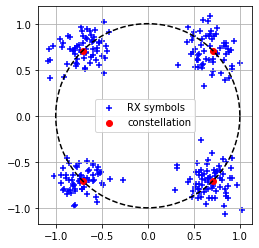

In [5]:
fig = plt.figure()
axe = fig.add_subplot(111)
axe.grid(True)
axe.set_aspect("equal")
axe.scatter(
    np.real(qpsk_payload),
    np.imag(qpsk_payload),
    color="blue",
    marker="+",
    label="RX symbols",
)
qpsk_co.plotConstellation(axe)
axe.legend(loc="best")